In [419]:
import pandas as pd
import numpy as np
import math
import datetime as dt
from scipy.optimize import brentq

In [420]:
df = pd.read_csv('ten_bonds_clean.csv')

df.coupon = df.coupon.str.replace('%', '').astype(float) / 100

df.maturity_date = pd.to_datetime(df.maturity_date)
df.issue_date = pd.to_datetime(df.issue_date)
df.coupon_payment_date = pd.to_datetime(df.coupon_payment_date, errors='coerce')
df.final_coupon_date = pd.to_datetime(df.final_coupon_date, errors='coerce')


df.head()

,name,issue_price,issue_date,coupon,denomination,payment_type,special_coupon_type,maturity_date,coupon_payment_date,payment_frequency,...,1-06,1-07,1-08,1-09,1-12,1-13,1-14,1-15,1-16,1-19
0,CAN 0.25 Feb 26,99.03,2020-10-09,0.0025,1000,regular interest,NaN,2026-03-01,2026-03-01,NaN,...,99.710,99.710,99.720,99.730,99.740,99.740,99.75,99.760,99.770,99.780
1,CAN 1 Aug 26,99.66,2021-04-16,0.0100,1000,regular interest,NaN,2026-09-01,2026-03-01,NaN,...,99.145,99.165,99.160,99.190,99.180,99.190,99.20,99.210,99.220,99.215
2,CAN 3 Jan 27,99.84,2024-11-01,0.0300,1000,regular interest,NaN,2027-02-01,2026-08-01,NaN,...,100.560,100.570,100.565,100.565,100.570,100.555,100.58,100.585,100.585,100.575
3,CAN 2.5 Jul 27,99.78,2025-05-15,0.0250,1000,regular interest,NaN,2027-08-01,2026-08-01,NaN,...,99.920,99.970,99.960,99.970,99.970,99.950,100.00,100.000,100.010,99.990
4,CAN 2.25 Jan 28,99.52,2025-11-14,0.0225,1000,regular interest,NaN,2028-02-01,2026-08-01,NaN,...,99.234,99.285,99.276,99.302,99.286,99.311,99.36,99.361,99.328,99.342


In [421]:
ttm_all = np.zeros(11)
periods_all = np.zeros(11)

for i in range(df.shape[0]):
    ttm_all[i] = days_difference = abs((df.iloc[i,7] - dt.datetime(2026,2,9)).days)/365
    periods_all[i] = int(round((ttm_all[i] + 0.5) * 2)/2*2)
    
df['ttm'], df['periods'] = ttm_all, periods_all
df

,name,issue_price,issue_date,coupon,denomination,payment_type,special_coupon_type,maturity_date,coupon_payment_date,payment_frequency,...,1-08,1-09,1-12,1-13,1-14,1-15,1-16,1-19,ttm,periods
0,CAN 0.25 Feb 26,99.03,2020-10-09,0.0025,1000,regular interest,NaN,2026-03-01,2026-03-01,NaN,...,99.720,99.730,99.740,99.740,99.750,99.760,99.770,99.780,0.054795,1.0
1,CAN 1 Aug 26,99.66,2021-04-16,0.0100,1000,regular interest,NaN,2026-09-01,2026-03-01,NaN,...,99.160,99.190,99.180,99.190,99.200,99.210,99.220,99.215,0.558904,2.0
2,CAN 3 Jan 27,99.84,2024-11-01,0.0300,1000,regular interest,NaN,2027-02-01,2026-08-01,NaN,...,100.565,100.565,100.570,100.555,100.580,100.585,100.585,100.575,0.978082,3.0
3,CAN 2.5 Jul 27,99.78,2025-05-15,0.0250,1000,regular interest,NaN,2027-08-01,2026-08-01,NaN,...,99.960,99.970,99.970,99.950,100.000,100.000,100.010,99.990,1.473973,4.0
4,CAN 2.25 Jan 28,99.52,2025-11-14,0.0225,1000,regular interest,NaN,2028-02-01,2026-08-01,NaN,...,99.276,99.302,99.286,99.311,99.360,99.361,99.328,99.342,1.978082,5.0
5,CAN 3.25 Aug 28,99.35,2022-10-21,0.0350,1000,regular interest,NaN,2028-03-01,2026-03-01,NaN,...,101.800,101.790,101.810,101.780,101.810,101.840,101.830,101.800,2.057534,5.0
6,CAN 4.00 Feb 29,99.42,2023-10-13,0.0400,1000,regular interest,NaN,2029-03-01,2026-03-01,NaN,...,103.740,103.730,103.760,103.720,103.760,103.790,103.780,103.740,3.057534,7.0
7,CAN 3.50 Aug 29,99.45,2024-04-08,0.0350,1000,regular interest,NaN,2029-09-01,2026-03-01,NaN,...,102.340,102.310,102.350,102.290,102.330,102.430,102.420,102.320,3.561644,8.0
8,CAN 2.75 Feb 30,99.63,2024-10-03,0.0275,1000,regular interest,NaN,2030-03-01,2026-03-01,NaN,...,99.498,99.580,99.528,99.503,99.658,99.663,99.613,99.583,4.057534,9.0
9,CAN 2.75 Aug 30,99.52,2025-04-10,0.0275,1000,regular interest,NaN,2030-09-01,2026-03-01,NaN,...,99.170,99.255,99.210,99.185,99.355,99.365,99.315,99.280,4.561644,10.0


In [422]:
def get_price(coupon, ytm, ttm, periods=2, face_value=100):
    price = 0
    for i in range(1, int(periods)):
        ti = ttm - 0.5*i
        price += coupon * math.exp(-ytm * ti)
    price += (coupon + face_value) * math.exp(-ytm * ttm)
    return price 
        
def get_ytm(curr_price, coupon, ttm, periods=2, face_value=100):
    ytm = coupon/100
    
    flag = True
    while flag:
        if (curr_price < face_value):
            ytm += 0.000001
        else:
            ytm -= 0.000001
        
        price = get_price(coupon, ytm, ttm, periods)
        
        if (curr_price < face_value):
            flag = price > curr_price
        else:
            flag = price < curr_price
    
    return ytm*100

In [423]:
dates = ["1-05","1-06","1-07","1-08","1-09","1-12","1-13","1-14","1-15","1-16","1-19"]

ytm_dict = {}
for k1 in df.index:
    ytm_dict[k1] = {}
    for d in dates:
        ytm_dict[k1][d] = None
                
for i in range(len(dates)):
    date = dates[i]
    day_s = df.loc[:,dates[i]]
    
    for j in range(len(day_s)):
        bond_j = day_s.index[j]
        close = day_s[j]
        coupon = df.loc[bond_j, 'coupon']/2
        ttm = df.loc[bond_j, 'ttm']
        
        ytm_day = get_ytm(close, coupon, ttm)
        ytm_dict[bond_j][date] = ytm_day
        
df_ytm = pd.DataFrame.from_dict(ytm_dict)
df_ytm = df_ytm.T
df_ytm

,1-05,1-06,1-07,1-08,1-09,1-12,1-13,1-14,1-15,1-16,1-19
0,5.52955,5.34645,5.34645,5.16345,4.98045,4.79745,4.79745,4.61445,4.43145,4.24845,4.06555
1,1.55440,1.55440,1.51830,1.52730,1.47320,1.49120,1.47320,1.45510,1.43710,1.41910,1.42810
2,-0.52510,-0.54040,-0.55050,-0.54550,-0.54550,-0.55050,-0.53530,-0.56070,-0.56580,-0.56580,-0.55560
3,0.05770,0.07130,0.03740,0.04420,0.03740,0.03740,0.05090,0.01240,0.01240,0.01010,0.02380
4,0.39765,0.40015,0.37415,0.37875,0.36555,0.37365,0.36095,0.33605,0.33555,0.35235,0.34515
5,-0.81670,-0.84060,-0.84060,-0.85010,-0.84540,-0.85490,-0.84060,-0.85490,-0.86920,-0.86450,-0.85010
6,-1.15320,-1.17530,-1.17840,-1.18790,-1.18470,-1.19420,-1.18160,-1.19420,-1.20370,-1.20050,-1.18790
7,-0.60670,-0.63690,-0.64790,-0.63970,-0.63140,-0.64240,-0.62600,-0.63690,-0.66440,-0.66160,-0.63420
8,0.13205,0.14945,0.11475,0.13085,0.11055,0.12345,0.12965,0.09125,0.09005,0.10235,0.10985
9,0.18985,0.20755,0.17225,0.18875,0.17005,0.17995,0.18545,0.14795,0.14575,0.15675,0.16445


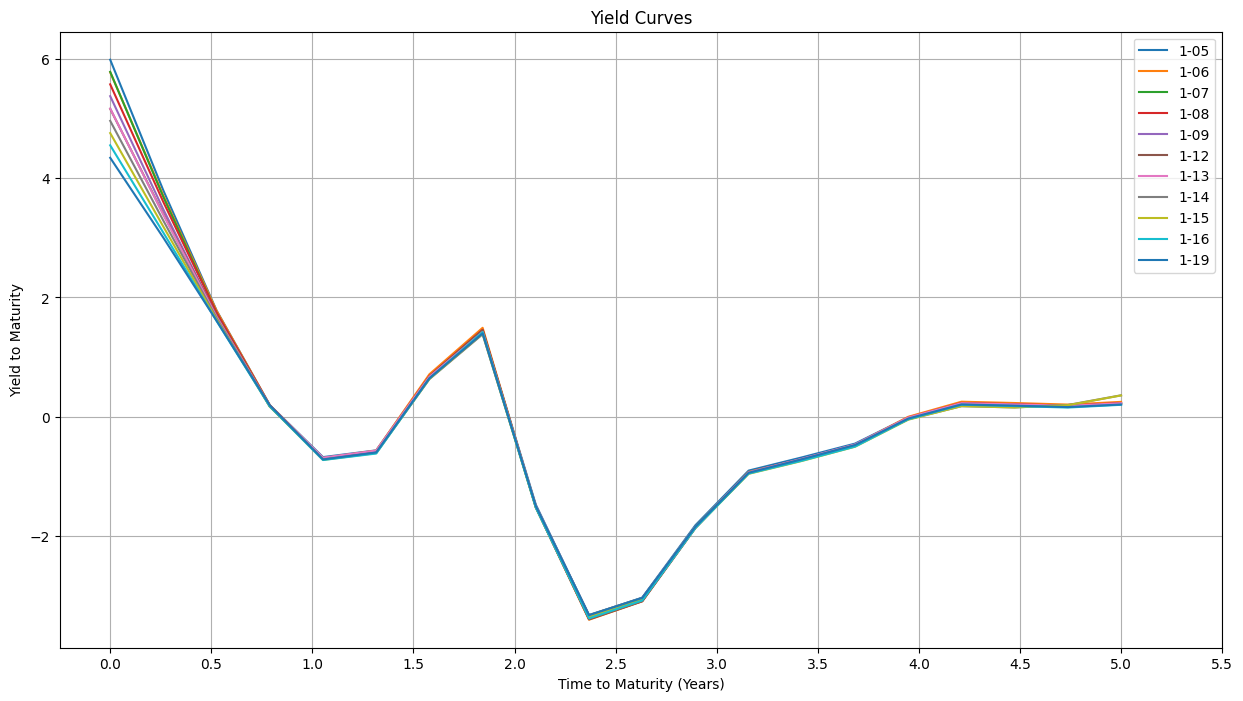

In [424]:
import scipy.interpolate
import matplotlib.pyplot as plt

all_ytm = []
X = np.linspace(0,5,20)
for d in df_ytm:
    out = scipy.interpolate.CubicSpline(x=df['ttm'].values, y=df_ytm[d].values, bc_type='natural')
    all_ytm.append(out(X))
    
plt.figure(figsize=(15,8))

for i in range(len(dates)):
    plt.plot(X, all_ytm[i], label=dates[i])
    
plt.title('Yield Curves')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Yield to Maturity')
plt.xticks(np.arange(0, 6, 0.5))
plt.grid()
plt.legend()
plt.show()

In [425]:
spot_dict = {}
for k1 in df.index:
    spot_dict[k1] = {}
    for d in dates:
        spot_dict[k1][d] = None
for j in range(11):
    for i in range(len(dates)):
        date = dates[i]
        s1 = ytm_dict[j][date]/100
        spot_dict[j][date] = s1
    
df_spot = pd.DataFrame.from_dict(spot_dict)
df_spot = df_spot.T
df_spot

,1-05,1-06,1-07,1-08,1-09,1-12,1-13,1-14,1-15,1-16,1-19
0,0.055296,0.053465,0.053465,0.051635,0.049805,0.047975,0.047975,0.046145,0.044315,0.042485,0.040656
1,0.015544,0.015544,0.015183,0.015273,0.014732,0.014912,0.014732,0.014551,0.014371,0.014191,0.014281
2,-0.005251,-0.005404,-0.005505,-0.005455,-0.005455,-0.005505,-0.005353,-0.005607,-0.005658,-0.005658,-0.005556
3,0.000577,0.000713,0.000374,0.000442,0.000374,0.000374,0.000509,0.000124,0.000124,0.000101,0.000238
4,0.003977,0.004002,0.003742,0.003788,0.003656,0.003737,0.003610,0.003361,0.003356,0.003524,0.003452
5,-0.008167,-0.008406,-0.008406,-0.008501,-0.008454,-0.008549,-0.008406,-0.008549,-0.008692,-0.008645,-0.008501
6,-0.011532,-0.011753,-0.011784,-0.011879,-0.011847,-0.011942,-0.011816,-0.011942,-0.012037,-0.012005,-0.011879
7,-0.006067,-0.006369,-0.006479,-0.006397,-0.006314,-0.006424,-0.006260,-0.006369,-0.006644,-0.006616,-0.006342
8,0.001320,0.001494,0.001148,0.001308,0.001106,0.001234,0.001296,0.000913,0.000901,0.001024,0.001099
9,0.001898,0.002075,0.001722,0.001887,0.001700,0.001799,0.001854,0.001479,0.001457,0.001567,0.001644


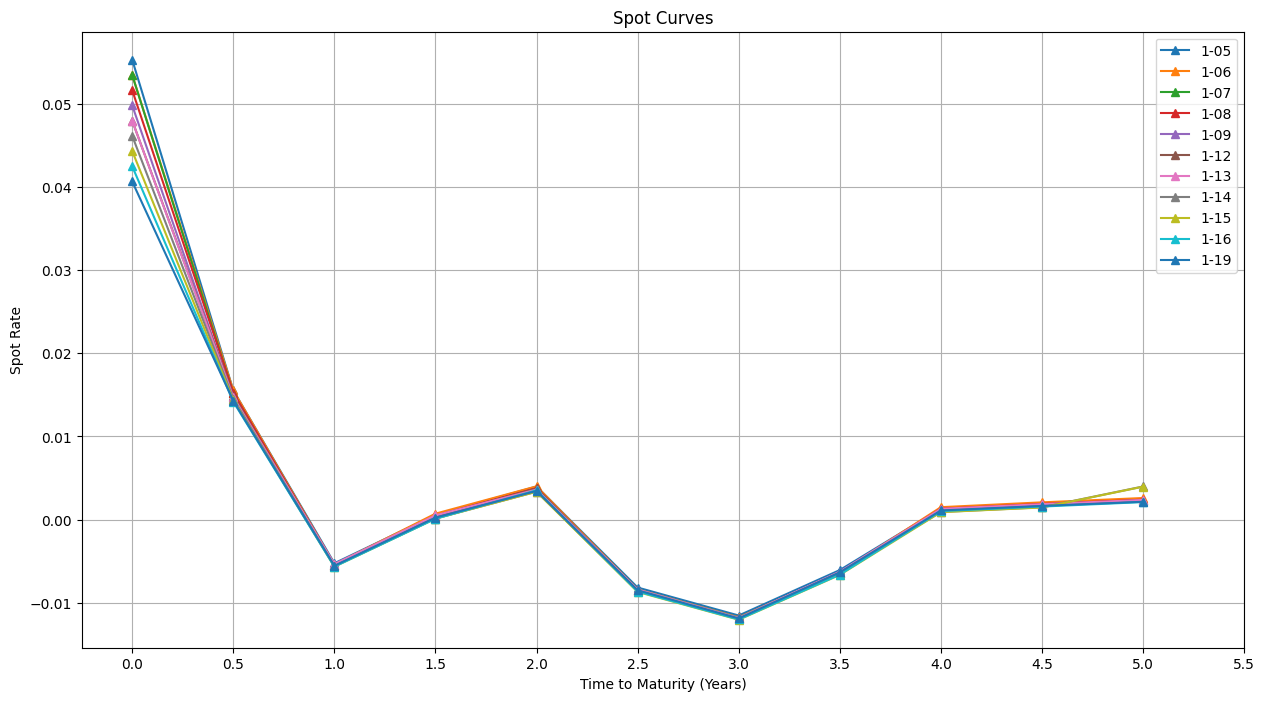

In [426]:
X = np.linspace(0,5,11)
plt.figure(figsize=(15,8))

for i in range(11):
    plt.plot(X, df_spot.iloc[:, i].values, label=dates[i], marker='^')
    
plt.title('Spot Curves')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Spot Rate')
plt.xticks(np.arange(0, 6, 0.5))
plt.grid()
plt.legend()
plt.show()

In [427]:
bonds_forwards = df_spot.loc[[2,4,6,8,10]]

for d in range(len(dates)):
    day_s = bonds_forwards.iloc[:, d]
    
    for i in range(1, len(day_s)):
        r_t2 = bonds_forwards.iloc[i, d]
        t2 = i+1
        r_t1 = bonds_forwards.iloc[0, d]
        t1 = 1
        
        f_t1t2 = (r_t2 * t2 - r_t1 * t1)/(t2-t1)
        
        bonds_forwards.iloc[i, d] = f_t1t2
        
bonds_forwards = bonds_forwards.iloc[1:,:]
bonds_forwards

,1-05,1-06,1-07,1-08,1-09,1-12,1-13,1-14,1-15,1-16,1-19
4,0.013204,0.013407,0.012988,0.013030,0.012766,0.012978,0.012572,0.012328,0.012369,0.012705,0.012459
6,-0.014672,-0.014927,-0.014923,-0.015091,-0.015043,-0.015160,-0.015047,-0.015109,-0.015226,-0.015178,-0.015040
8,0.003511,0.003794,0.003365,0.003563,0.003292,0.003481,0.003513,0.003086,0.003087,0.003251,0.003317
10,0.004332,0.004597,0.004208,0.004358,0.004133,0.004303,0.004295,0.006380,0.006368,0.004048,0.004071


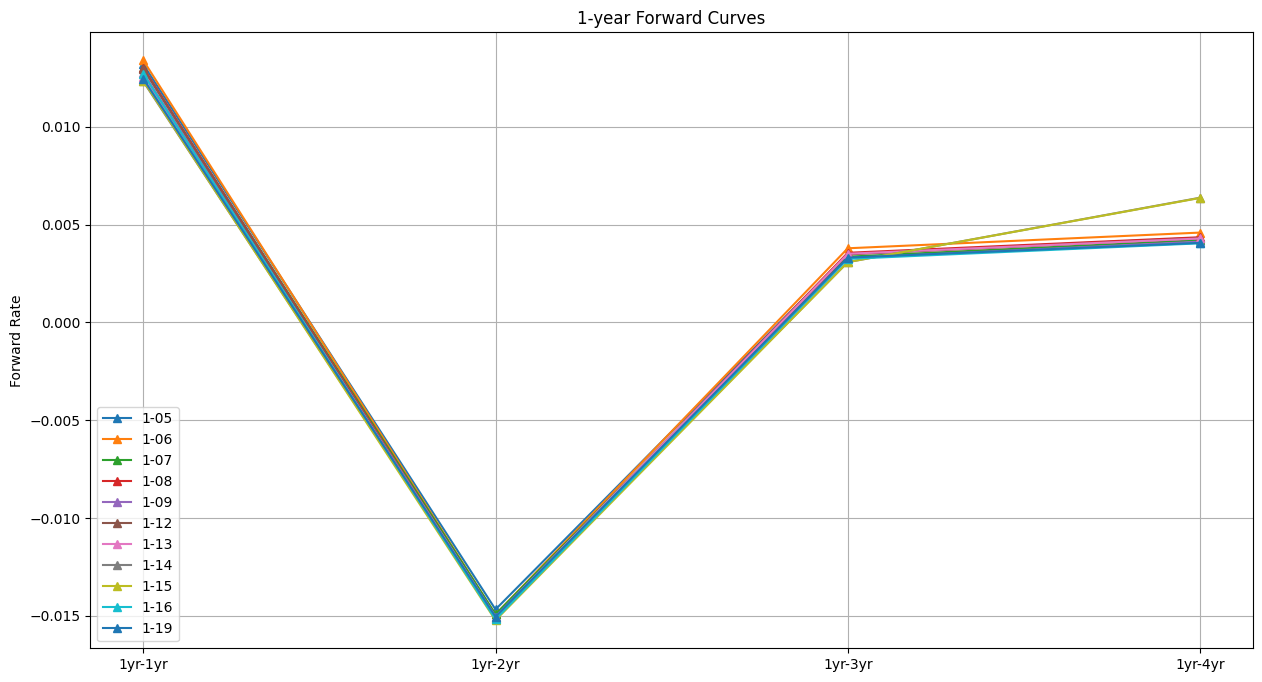

In [428]:
plt.figure(figsize=(15,8))

for i in range(len(dates)):
    plt.plot(bonds_forwards.iloc[:, i].values, label=dates[i], marker='^')
    
plt.title('1-year Forward Curves')
plt.ylabel('Forward Rate')
plt.grid()
plt.legend()
plt.xticks(np.arange(4),['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr'])
plt.show()

In [429]:
ytm_arr = df_ytm.iloc[:, ::-1].to_numpy()
ytmR_arr = np.log(ytm_arr[:, 1:]/ytm_arr[:,:-1])
ytmR_arr

array([[ 0.04400518,  0.04217263,  0.04046584,  0.03889184,  0.        ,
         0.03743572,  0.03608471,  0.03482783,  0.        ,  0.03367365],
       [-0.00632202,  0.01260433,  0.01244743,  0.01236228,  0.01214426,
        -0.01214426,  0.03606457, -0.00591018,  0.02349833,  0.        ],
       [ 0.01819205,  0.        , -0.00905466, -0.04635867,  0.02799962,
        -0.00912415,  0.        ,  0.00912415, -0.01851735, -0.02872089],
       [-0.85715016,  0.20516105,  0.        ,  1.41216645, -0.30819222,
         0.        ,  0.16705408, -0.16705408,  0.64522562, -0.21163915],
       [ 0.02064589, -0.04885402,  0.00148898,  0.07147949,  0.03458009,
        -0.02191646,  0.03547329, -0.01221957,  0.06718269, -0.00626726],
       [ 0.01679732,  0.00542194, -0.01658875, -0.01686858,  0.01686858,
        -0.01117461,  0.0055441 , -0.01123807,  0.        , -0.02884409],
       [ 0.01055109,  0.00266201, -0.00792364, -0.01060705,  0.01060705,
        -0.00798693,  0.00269746, -0.00802946

In [430]:
ytmR_arr = ytmR_arr[[0,2,4,6,8], :]
ytmR_arr

array([[ 0.04400518,  0.04217263,  0.04046584,  0.03889184,  0.        ,
         0.03743572,  0.03608471,  0.03482783,  0.        ,  0.03367365],
       [ 0.01819205,  0.        , -0.00905466, -0.04635867,  0.02799962,
        -0.00912415,  0.        ,  0.00912415, -0.01851735, -0.02872089],
       [ 0.02064589, -0.04885402,  0.00148898,  0.07147949,  0.03458009,
        -0.02191646,  0.03547329, -0.01221957,  0.06718269, -0.00626726],
       [ 0.01055109,  0.00266201, -0.00792364, -0.01060705,  0.01060705,
        -0.00798693,  0.00269746, -0.00802946, -0.00263415, -0.01898275],
       [-0.07071749, -0.12803324,  0.01323792,  0.35123552, -0.0490023 ,
        -0.11036831,  0.16858372, -0.13129578,  0.26420604, -0.12378125]])

In [431]:
ytmR_cov = np.cov(ytmR_arr)
ytmR_cov

array([[ 2.72924721e-04, -6.92555567e-05, -3.15932613e-04,
        -4.05920384e-05, -7.51771121e-04],
       [-6.92555567e-05,  4.84616866e-04, -2.39943410e-04,
         1.64291323e-04, -2.17224693e-03],
       [-3.15932613e-04, -2.39943410e-04,  1.50624662e-03,
         4.61351954e-05,  6.01659384e-03],
       [-4.05920384e-05,  1.64291323e-04,  4.61351954e-05,
         9.12386024e-05, -9.41431561e-05],
       [-7.51771121e-04, -2.17224693e-03,  6.01659384e-03,
        -9.41431561e-05,  3.18794656e-02]])

In [432]:
forwards_arr = bonds_forwards.iloc[:, ::-1].to_numpy()
forwards_arr = np.vstack(forwards_arr[:, :]).astype(np.float64)
forwards_arr

array([[ 0.012459  ,  0.012705  ,  0.012369  ,  0.012328  ,  0.012572  ,
         0.012978  ,  0.012766  ,  0.01303   ,  0.012988  ,  0.013407  ,
         0.013204  ],
       [-0.0150405 , -0.0151785 , -0.0152265 , -0.0151095 , -0.0150475 ,
        -0.0151605 , -0.015043  , -0.015091  , -0.0149235 , -0.0149275 ,
        -0.0146725 ],
       [ 0.00331667,  0.00325067,  0.00308667,  0.00308567,  0.003513  ,
         0.003481  ,  0.00329233,  0.003563  ,  0.003365  ,  0.003794  ,
         0.003511  ],
       [ 0.00407088,  0.00404763,  0.00636763,  0.00637988,  0.00429513,
         0.00430313,  0.00413313,  0.00435813,  0.00420813,  0.00459663,
         0.00433213]])

In [433]:
forwards_returns_arr = np.log(forwards_arr[:, 1:]/forwards_arr[:,:-1])
forwards_returns_cov = np.cov(forwards_returns_arr)
forwards_returns_cov

array([[ 4.56698846e-04,  1.02379534e-04,  1.18091942e-03,
        -1.63880102e-03],
       [ 1.02379534e-04,  7.29576069e-05,  2.09553957e-04,
         5.64065066e-04],
       [ 1.18091942e-03,  2.09553957e-04,  5.85445021e-03,
        -5.71168531e-03],
       [-1.63880102e-03,  5.64065066e-04, -5.71168531e-03,
         4.20526332e-02]])

In [434]:
ytmR_eigenvalues, ytmR_eigenvectors = np.linalg.eig(ytmR_cov)
print('Associated Eigenvalues and vectors of daily log-returns of yield')
for i in range(5):
    print(f'Eigenvector { ytmR_eigenvectors[i]} with Eigenvalue {ytmR_eigenvalues[i]}')


Associated Eigenvalues and vectors of daily log-returns of yield
Eigenvector [-0.0240261   0.44632839 -0.41427135  0.79147491 -0.04648045] with Eigenvalue 0.03319236529788918
Eigenvector [-0.06640946 -0.59703709 -0.64703326 -0.03151627 -0.46849885] with Eigenvalue 0.0006752119638997798
Eigenvector [ 0.18679392 -0.60747036  0.48090505  0.60247182  0.04296324] with Eigenvalue 0.0002262438258266384
Eigenvector [-0.00282661 -0.26077123 -0.39610401 -0.00865948  0.8803505 ] with Eigenvalue 0.00012834779121672136
Eigenvector [ 0.97985334  0.08553249 -0.14683036 -0.09760591 -0.03854287] with Eigenvalue 1.23235625039979e-05


In [435]:

forwards_returns_eigenvalues, forwards_returns_eigenvectors = np.linalg.eig(forwards_returns_cov)
print('Associated Eigenvalues and vectors of daily log-returns of forward rates')


for i in range(4):
    print(f'Eigenvector { forwards_returns_eigenvectors[i]} with Eigenvalue {forwards_returns_eigenvalues[i]}')


Associated Eigenvalues and vectors of daily log-returns of forward rates
Eigenvector [ 0.04223295 -0.18902455  0.91683721 -0.34913554] with Eigenvalue 0.04301493736488775
Eigenvector [-0.01212059 -0.0609754   0.34467203  0.93666231] with Eigenvalue 0.005169812578181259
Eigenvector [ 0.15301668 -0.96737606 -0.20148593  0.01314783] with Eigenvalue 0.00022894438371274224
Eigenvector [-0.98724636 -0.1572745   0.00376036 -0.02439724] with Eigenvalue 2.304550397536971e-05
